In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wandb_loader import get_sweep_results, EPOCH, COCO_AP

colors = sns.color_palette()

sns.set(
    style='whitegrid',
    font_scale=1.2,
    rc={
        'lines.linewidth': 1.2,
        'lines.markersize': 18,
    }
)

fig_path = Path('./imgs')

## AP van joint models met RoI head op gedeelde bbox head voor backbone met en zonder FPN

- Met FPN: sweep [ndhfhhv4](https://wandb.ai/jpdr/experiments/sweeps/ndhfhhv4)
- Zonder FPN: `roi_head` branch in sweep [an4t3eqd](https://wandb.ai/jpdr/experiments/sweeps/an4t3eqd)

In [3]:
df_fpn = get_sweep_results("ndhfhhv4", lazy=True)
df_no_fpn = get_sweep_results("an4t3eqd", lazy=True, config_keys=['branch_layer'])

ROI_INPUT = 'Recog RoI input'

bl_to_roi_input = {
    'layer1': 'conv1',
    'layer2': 'conv2_x',
    'layer3': 'conv3_x',
    'layer4': 'conv4_x',
    'bbox_head': 'conv5_x',
    'final_pool': 'pool',
    'roi_head': 'bbox head',
}

df_no_fpn[ROI_INPUT] = df_no_fpn['branch_layer'].apply(lambda k: bl_to_roi_input[k])

df_no_fpn['FPN'] = 'Without FPN'
df_fpn['FPN'] = 'With FPN'

df = pd.concat(
    [df_fpn,
     df_no_fpn[df_no_fpn[ROI_INPUT].isin(['bbox head'])]],
    ignore_index=True
)

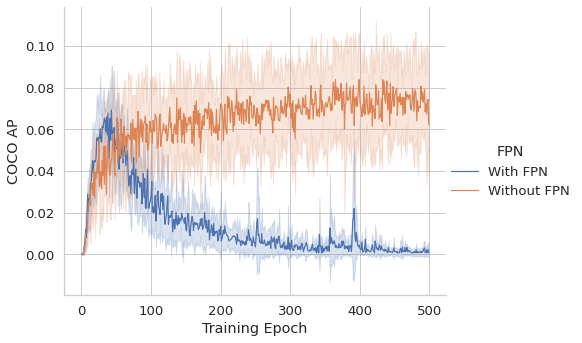

In [4]:
fig = sns.relplot(
    data=df,
    x=EPOCH, y=COCO_AP, kind='line', ci='sd', aspect=4/3,
    hue='FPN',
)

In [5]:
fig.savefig(fig_path / 'COCO_AP_shared_bbox_FPN_vs_noFPN.png')